The DAL has integrated a convenient function to retrieve data from WebCTRL.

Currently, there are two versions included in the library: a legacy version based on the `suds` package, which implements complex logic to handle various scenarios; a light-weight version based on the `zeep` package, which offers the same API.

This article introduces the basic usage of the light-weight webctrl module, `simple_wc`, which contains two functions to retrieve data:

* `get_point`, to retrieve the latest data point
* `get_trend`, to retrieve past trend data over a period of time

In [1]:
from UTCDAL.Utilities.DataAccess.simple_wc import get_trend, get_value
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
url = '172.31.3.16'
GQL_point = '#utrc_vav-1-9/zone_co2'
GQL_trend = '#utrc_l_meter_6/btu_rate_tnd'

We have a `login` function in the Utilities module that allows user to input the credentials for WebCTRL.

In [3]:
from UTCDAL.Utilities import login

In [4]:
username, password = login()

## Point data

Get the latest data point with `get_value` function:

In [5]:
get_value(GQL_point, url, username, password)

Using cached xmlsoap schemas


487.0

Wait some time, call the same function again, we can see the value is updating.

In [6]:
get_value(GQL_point, url, username, password)

Using cached xmlsoap schemas


487.0

## Trend data

Get the past trend data point with `get_value` function:

In [7]:
df = get_trend(GQL_trend, '2018-5-1', 10, url, username, password)
print(df.shape)
df.head()

Using cached xmlsoap schemas
Request sent. Waiting for WebCTRL response...
Received 14400 data points.
(14400, 1)


,#utrc_l_meter_6/btu_rate_tnd
2018-05-01 00:00:00,0.0
2018-05-01 00:01:00,0.0
2018-05-01 00:02:00,0.0
2018-05-01 00:03:00,0.0
2018-05-01 00:04:00,0.0


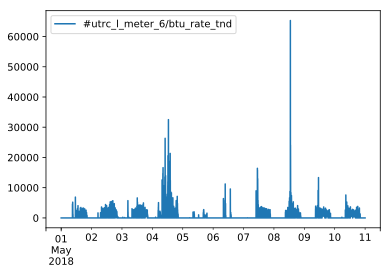

In [8]:
df.plot()

## Error handling

The functions can correctly throw exceptions when user have provided invalid inputs.

In [9]:
try:
    get_value(GQL_point+'/nonexist/point/', url, username, password)
except Exception as e:
    print(e)

Using cached xmlsoap schemas
java.rmi.RemoteException: database error: child of "/trees/geographic/#utrc_east_hartford_campus/#utrc_l_building/#utrc_l_first_floor/#utrc_vav-1-9/zone_co2" with name "nonexist" does not exist


try:
    get_value(GQL_point, url, username, password+'wrongpassword')
except Exception as e:
    print(e)